In [8]:
import tensorflow as tf
import cv2
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [9]:
model = tf.keras.models.load_model("./../Code/models/single_rgb_image")
BUCKET_SIZE = 60


In [10]:
steps_horizontal =  1920/60
steps_vertikal = 1080/60


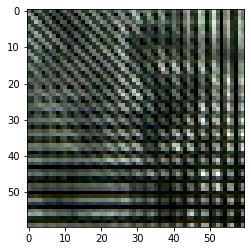

array([[0.00069895]], dtype=float32)

In [15]:
img = cv2.imread("D:\Main\MA_PROGR\Data\Train\LED_Wand_Aufnahmen\Alias\LED_Wand_20122.png")
# img = cv2.imread("D:\\Main\\MA_PROGR\\Data\\Train\\LED_Wand_Aufnahmen\\NoAlias\\beautiful_water_178.png")

plt.imshow(img)
plt.show()

img = np.asarray(img)/255

img = img.reshape(1, 60, 60, 3)

prediction =  model.predict(img)
prediction


In [22]:
# DATA_PATH = "D:\Main\MA_PROGR\Data\LED_Wand_Aufnahmen_01\orig_als_einzelbilder\water\water_20.tif"
DATA_PATH = "D:\Main\MA_PROGR\Data\Test\LED_Wand_water\water_32.tif"

def get_mean_alias_value_for_whole_picture(img, skip_every_nth=1, n_channels=3):
    alias_values = []
    for y in range(int(steps_vertikal)):
        if y % skip_every_nth != 0:
            continue
        for x in range(int(steps_horizontal)):
            if x % skip_every_nth != 0:
                continue
            bucket = img[y*BUCKET_SIZE:(y+1)*BUCKET_SIZE, x *
                         BUCKET_SIZE:(x+1)*BUCKET_SIZE]
            # print(f"y: {y}, x: {x}")
            bucket = np.asarray(bucket).reshape(1, BUCKET_SIZE, BUCKET_SIZE, n_channels) / 255
            prediction = model.predict(bucket)
            # print(prediction)
            alias_values.append(prediction[0][0])
    return(1 - statistics.mean(alias_values))
    

img = cv2.imread(DATA_PATH)

get_mean_alias_value_for_whole_picture(img, 4)


0.261371910572052